W= 0.029092051
B= 0.44314474
deltaW= -12.408319
delteB= 11.303758


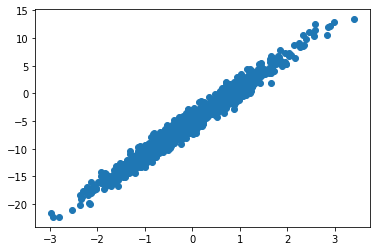

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# define the dataset
x = tf.random.normal([1000])
y = 6 * x - 5 + tf.random.normal([1000])  

W = tf.Variable(np.random.randn()) # weight
B = tf.Variable(np.random.randn()) # bias

plt.scatter(x,y)

epochs = []
loss = []

# Find the derivative of loss with respect to weight and bias
def grad(x, y, weights, biases):
    
  with tf.GradientTape() as tape:
    # loss_ = loss(x, y, weights, biases)
    prediction = weights * x + biases
    
    error = prediction - y
    
    squaredError = tf.square(error)
    
    loss_ = tf.reduce_mean(input_tensor=squaredError)
    
  return tape.gradient(loss_, [weights, biases]) # direction and value of the gradient of our loss w.r.t weight and bias

print("W=",W.numpy())
print("B=",B.numpy())

deltaW, deltaB = grad(x, y, W, B) #
print("deltaW=",deltaW.numpy())
print("delteB=",deltaB.numpy())

In [5]:
for i in range(400):
    deltaW, deltaB = grad(x, y, W, B) #
    change_W = deltaW * 0.01 
    change_B = deltaB * 0.01
    # print("change_W:{0}, change_B:{1}".format(change_W,change_B))
    W.assign_sub(change_W)
    B.assign_sub(change_B)
    
    # find Loss for New Weight and Bias values
    prediction = W * x + B
    error = prediction - y
    squared_error = tf.square(error)
    loss_ = tf.reduce_mean(input_tensor=squared_error)
    epochs.append(i)
    loss.append(loss_)
    if i%10 ==0:
        print("Step:{0} and Loss:{1}".format(i,loss_))
    
print(len(loss))

Step:0 and Loss:1.073978304862976
Step:10 and Loss:1.073978304862976
Step:20 and Loss:1.073978304862976
Step:30 and Loss:1.073978304862976
Step:40 and Loss:1.073978304862976
Step:50 and Loss:1.073978304862976
Step:60 and Loss:1.073978304862976
Step:70 and Loss:1.073978304862976
Step:80 and Loss:1.073978304862976
Step:90 and Loss:1.073978304862976
Step:100 and Loss:1.073978304862976
Step:110 and Loss:1.073978304862976
Step:120 and Loss:1.073978304862976
Step:130 and Loss:1.073978304862976
Step:140 and Loss:1.073978304862976
Step:150 and Loss:1.073978304862976
Step:160 and Loss:1.073978304862976
Step:170 and Loss:1.073978304862976
Step:180 and Loss:1.073978304862976
Step:190 and Loss:1.073978304862976
Step:200 and Loss:1.073978304862976
Step:210 and Loss:1.073978304862976
Step:220 and Loss:1.073978304862976
Step:230 and Loss:1.073978304862976
Step:240 and Loss:1.073978304862976
Step:250 and Loss:1.073978304862976
Step:260 and Loss:1.073978304862976
Step:270 and Loss:1.073978304862976
Ste

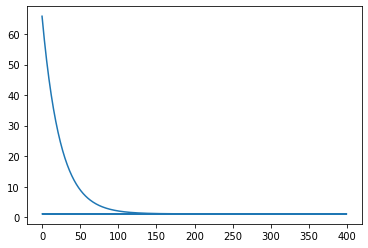

In [6]:
plt.plot(epochs,loss)